# Derivation of FRET and S correction formulas

*Antonino Ingargiola* - [github page](https://github.com/tritemio)

# Abstract

*In this notebook we derive different expression for correction of $E$ and $S$ in us-ALEX measurements. The main reference is [Lee et al. (Biophys. J. 2005)](http://www.chem.ucla.edu/~michalet/papers/BJ2005.pdf), but here we derive many more expression not present in the original paper. The algebric part is performed through [Computer-assisted symbolic computation](http://en.wikipedia.org/wiki/Computer_algebra_system) using [Sympy](http://sympy.org/en/index.html) for proof the correctness.*

## Revisions
- Oct 09, 2014: Added expressions for $S$
- Aug 05, 2014: public release

# 1. Definitions

Let define the FRET efficiency $E$ and the proximity ratio $E_R$:

$$ E = \frac{n_a}{n_a +  \gamma \, n_d} \qquad E_R = \frac{n^*_a}{n^*_a +  \, n_d}$$

where $n_d$, $n_a$ are the donor and acceptor detected counts after all the corrections, while $n^*_a$ is the acceptor counts with only background correction (no leakage and direct excitation corrections).

Similarly, the definitions of uncorrected stoichiometry ($S_R$) and corrected stoichiometry ($S$) are:

$$ S_{R}  = \frac{n_d + n^*_a}{n_d + n^*_a + n_{aa}}$$ 

$$ S  = \frac{\gamma n_d + n_a}{\gamma n_d + n_a + n_{aa}}$$ 

The relation between $n_a$ and $n^*_a$ is:

$$n^*_a = n_a + L_k \, n_d + n_{dex}$$

The term $n_{dex}$ can be equivalently expressed as:

1) a function of $n_{aa}$:

   $$  n_{dex} = d_{exAA} \cdot n_{aa}$$

2) a function of the "total signal" $n_a + \gamma\,n_d$:

   $$ n_{dex} = d_{exT} \cdot (n_a + \gamma\,n_d) $$
   
3) a function of the "total signal" $n_a/\gamma + n_d$:

   $$ n_{dex} = d_{exT'} \cdot (n_a/\gamma + n_d) $$

4) a function of $n_d$:

   $$ n_{dex} = d_{exD} \cdot n_d $$

5) a function of $n_a$:

   $$ n_{dex} = d_{exA} \cdot n_a $$


### Def. 1
The coefficient $d_{exAA}$ can be computed from an acceptor-only population in an ALEX measurement as:

$$ d_{exAA} = \frac{n_a}{n_{aa}} $$

In terms of physical parameters it is:

$$ d_{exAA} = \frac{I_{532}}{I_{628}} \frac{\sigma_{A532}}{\sigma_{A628}} $$

> **NOTE:** This coefficient is $d$ in [Biophysical Journal paper (p. 2943)](http://www.chem.ucla.edu/~michalet/papers/BJ2005.pdf)

### Def. 2
The coefficient $d_{exT}$ can't be computed from the data but only from the physical parameters:

$$ d_{exT} = \frac{\sigma_{A532}}{\sigma_{D532}} $$

### Def. 3
The coefficient $d_{exT'}$ can't be computed from the data but only from the physical parameters:

$$ d_{exT'} = \frac{\sigma_{A532}}{\sigma_{D532}} \gamma$$

> **NOTE:** This is $d'$ in the Biophysical Journal paper [p. 2943](http://www.chem.ucla.edu/~michalet/papers/BJ2005.pdf) and [SI](http://www.chem.ucla.edu/~michalet/papers/BJ2005SI.pdf)

### Def. 4
The coefficient $d_{exD}$ is a function of $E$ as well as the physical parameters.

$$ n_{dex} = I_{532} \, \sigma_{A532} \, \phi_A \, \eta_{AA} $$

$$ n_{d} = I_{532} \, \sigma_{D532} \, \phi_D \, \eta_{DD} (1 - E) $$

Taking the ratio:

$$ d_{exD} = \frac{ \sigma_{A532} }{\sigma_{D532}} \frac{\gamma}{1 - E} = d_{exT} \frac{\gamma}{1 - E} $$

### Def. 5
The coefficient $d_{exA}$ is a function of $E$ as well as the physical parameters.

$$ n_{dex} = I_{532} \, \sigma_{A532} \, \phi_A \, \eta_{AA} $$

$$ n_{a} = I_{532} \, \sigma_{D532} \, E \, \phi_A \, \eta_{AA} $$

Taking the ratio:

$$ d_{exA} = \frac{ \sigma_{A532} }{\sigma_{D532}} E $$

## Discussion of "Def. 1-5"

Definitions 4 and 5 are inconvenient because the coefficient depends on $E$. "Def. 3" does not depend on $E$ but depends on $\gamma$, while "Def. 2" depends only on the ratio of two absorption cross sections. "Def. 1" can only be used in an ALEX measurement and will be used below for the $S$ expression.

So, for non-ALEX measurement, "Def. 2" gives the simpler coefficient.

As physical interpretation, definitions 2 and 3 are similar. In "Def. 2", when $E=1$, the "total signal" is the background-corrected counts. When $E < 1$, the total corrected counts do not change (at the same excitation intensity): they are the sum of acceptor and gamma-corrected donor counts. Similar considerations hold for "Def. 3" (starting from $E=0$).


# 2. Derivation of the expressions

## 2.1 Import libraries

In [1]:
import sympy
from sympy import init_printing, symbols, solve, Eq
init_printing()  # beautiful maths

## 2.2 Relating $E$ and $E_R$

### Define the symbols

In [2]:
E, Er = symbols('E, E_R')
nd, na, ns_a, n_dex = symbols('n_d n_a n^*_a n_dex')
gamma, Lk = symbols('gamma L_k')
d_exAA, d_exT, d_exD = symbols("d_exAA d_exT, d_exD")

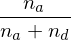

In [3]:
def PR(nd, na):
    return na/(na + nd)

PR(nd, na)

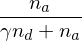

In [4]:
def FRET(nd, na, gamma):
    return na / (na + gamma*nd)

FRET(nd, na, gamma)

### Symbolic computation: $E = f(E_R)$

As a first step we write $n^*_a$ as a function of $n_a$ and save the symbolic expression:

In [5]:
ns_a_as_func_na = na + Lk*nd + n_dex
ns_a_as_func_na

Here we write the PR substituting $n^*_a$ with $n_a + L_k n_d + n_{dex}$ and $n_{dex}$ with the "Def. 2" expression:

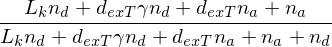

In [6]:
Er_sym = sympy.factor(PR(nd, ns_a).subs(ns_a, ns_a_as_func_na).subs(n_dex, d_exT*(nd*gamma + na)))

Er_sym

The previous expression is the proximity ratio $E_R$. We "solve" it to obtain $n_d$ as a function of $E_R$. Then we replace the obtained expression in the FRET formula:

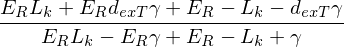

In [7]:
E_sym = sympy.factor(FRET(nd, na, gamma).subs(nd, solve(Er_sym - Er, nd)[0]))

E_sym

The previous expression is $E$ as a function of $E_R$, including gamma, leakage and direct excitation coefficients. It is the same of [equation S9](http://www.chem.ucla.edu/~michalet/papers/BJ2005SI.pdf) when we replace $d_{exT}\gamma$ with $d'$.

Collecting $E_R$ we obtain an equivalent expression:

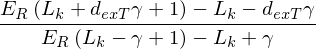

In [8]:
sympy.collect(E_sym, Er)

From this symbolic expression we can define the python function:

In [9]:
def correct_E_gamma_leak_dir(Eraw, gamma, leakage=0, dir_ex_t=0):
    Eraw = np.asarray(Eraw)
    return (Eraw*(leakage + dir_ex_t*gamma + 1) - leakage - dir_ex_t*gamma) \
           / ( Eraw*(leakage -  gamma + 1) - leakage + gamma )

Now we can derive the simpler expression in the case we want to correct only one parameter.

For only gamma correction we obtain:

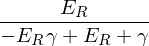

In [10]:
E_sym.subs(Lk, 0).subs(d_exT, 0)

For the only leakage correction we obtain:

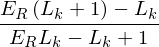

In [11]:
sympy.collect(E_sym.subs(gamma, 1).subs(d_exT, 0), Er)

For the only direct excitation correction we obtain:

In [12]:
sympy.collect(E_sym.subs(gamma, 1).subs(Lk, 0), Er)

> **NOTE:** The latter 3 formulas for correcting only one coefficient cannot be chained. In other words, applying them in sequence **do not** yield the same result as applying the complete formula.

### Symbolic computation: $E_R = f^{-1}(E)$

Conversely, to compute $E_R$  as a function of $E$ we invert the previous expression:

In [13]:
Er_as_func_E = solve(E - E_sym, Er)[0]

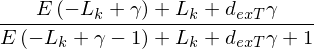

In [14]:
sympy.collect(Er_as_func_E, E)

And we define the python function:

In [15]:
def uncorrect_E_gamma_leak_dir(E, gamma, leakage=0, dir_ex_t=0):
    E = np.asarray(E)
    return (E*(gamma - leakage) + leakage + dir_ex_t*gamma) \
           / ( E*(gamma - leakage - 1) + leakage + dir_ex_t*gamma + 1 )

And the inverse for only a single correction are (in the order gamma, leakage, direct excitation)

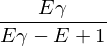

In [16]:
Er_as_func_E.subs(Lk, 0).subs(d_exT, 0)

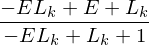

In [17]:
sympy.collect(Er_as_func_E.subs(gamma, 1).subs(d_exT, 0), Er)

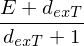

In [18]:
sympy.collect(Er_as_func_E.subs(gamma, 1).subs(Lk, 0), Er)

## 2.3 Relating $S$ and $S_R$

In this section we derive the expression of $S$ (corrected stoichiometry) as a function of $S_R$ (uncorrected stoichiometry). See section 1 for the expression of $S$ and $S_R$. 

### Define the symbols

In [19]:
S, Sr = symbols('S, S_R')
nd, na, ns_a, n_dex, naa = symbols('n_d n_a n^*_a n_dex n_aa')
gamma, Lk = symbols('gamma L_k')
d_exAA, d_exT, d_exD = symbols("d_exAA d_exT, d_exD")

In [20]:
# S, Sr = symbols('S, Sr')
# nd, na, ns_a, n_dex, naa = symbols('nd na n^*_a n_dex naa')
# gamma, Lk = symbols('gamma Lk')
# d_exAA, d_exT, d_exD = symbols("d_exAA d_exT, d_exD")

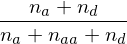

In [21]:
def StoichRaw(nd, na, naa):
    return (na + nd)/(na + nd + naa)

StoichRaw(nd, na, naa)

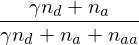

In [22]:
def Stoich(nd, na, naa, gamma):
    return (na + gamma*nd)/(na + gamma*nd + naa)

Stoich(nd, na, naa, gamma)

### Symbolic computation: $S = f(S_R)$

As a first step we write $n^*_a$ as a function of $n_a$ and save the symbolic expression:

In [23]:
ns_a_as_func_na = na + Lk*nd + n_dex
ns_a_as_func_na

Here we write $S_R$ substituting $n^*_a$ with $n_a + L_k n_d + n_{dex}$ and $n_{dex}$ 
with the "Def. 1" expression:

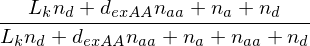

In [24]:
Sr_sym = sympy.factor(
    StoichRaw(nd, ns_a, naa).subs(ns_a, ns_a_as_func_na).subs(n_dex, d_exAA*naa)
    )

Sr_sym

The previous expression is the $S_R$. Like we did for $E$, we "solve" the previous expression to obtain one of $n_d$, $n_a$, $n_{aa}$ as a function of $S_R$. Then we replace the obtained expression in the $S$ formula of corrected stoichiometry.

Unfortunately in this case the resulting expression still depends on 2 of the 3 burst-size components ($n_d$, $n_a$, $n_{aa}$). For $E$ instead, we had obtained an expression that was function only of $E_R$ and the correction factors.

Nonetheless, the expression can still be useful. It's convenient to use in the formula the experimental $n_d$ and $n_{aa}$ (after background correction). In fact, if we would use $n_a$ instead, we would need to apply the leakage and direct excitation corrections before using it. 

So, let "solve" $S_R$ respect to $n_a$:

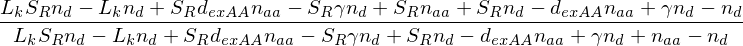

In [25]:
S_sym = sympy.factor(
    Stoich(nd, na, naa, gamma).subs(na, solve(Sr_sym - Sr, na)[0])
    )

S_sym

The previous formula is the expression of $S$ as a function of $S_R$, $n_d$, $n_{aa}$ and of all the correction coefficient.

Now we just do some passages to try to obtain a more compact expression:

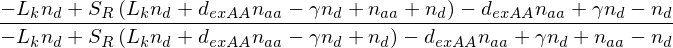

In [26]:
S_sym2 = S_sym.collect(Sr).collect(na).collect(gamma)
S_sym2

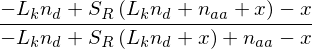

In [27]:
x = symbols('x')
S_sym3 = S_sym2.subs(nd - nd*gamma + d_exAA*naa, x)
S_sym3

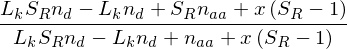

In [28]:
S_sym4 = S_sym3.factor().collect(x)
S_sym4

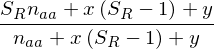

In [29]:
y = symbols('y')
S_sym5 = S_sym4.subs(Lk*Sr*nd - Lk*nd, y)
S_sym5

Where 

$$x = n_d - n_d \gamma + d_{exAA} n_{aa}$$  

$$y = L_k S_R n_d - L_k n_d$$

The previous formula is another expression of $S$ as a function of $S_R$, $n_d$, $n_{aa}$ and of all the correction coefficient.

From here, we can express the function (both 1 and 5) in a python function:

In [30]:
print(S_sym)

(L_k*S_R*n_d - L_k*n_d + S_R*d_exAA*n_aa - S_R*gamma*n_d + S_R*n_aa + S_R*n_d - d_exAA*n_aa + gamma*n_d - n_d)/(L_k*S_R*n_d - L_k*n_d + S_R*d_exAA*n_aa - S_R*gamma*n_d + S_R*n_d - d_exAA*n_aa + gamma*n_d + n_aa - n_d)


In [31]:
print(S_sym5)

(S_R*n_aa + x*(S_R - 1) + y)/(n_aa + x*(S_R - 1) + y)


In [32]:
def correct_S1(Sr, nd, naa, gamma, d_exAA, Lk):
    return ((Lk*Sr*nd - Lk*nd + Sr*d_exAA*naa - Sr*gamma*nd + Sr*naa + Sr*nd - d_exAA*naa + gamma*nd - nd)/
            (Lk*Sr*nd - Lk*nd + Sr*d_exAA*naa - Sr*gamma*nd + Sr*nd - d_exAA*naa + gamma*nd + naa - nd))

In [33]:
def correct_S5(Sr, nd, naa, gamma, d_exAA, Lk):
    x = nd - gamma*nd + d_exAA*naa
    y = Lk*Sr*nd - Lk*nd 
    return (Sr*naa + x*(Sr - 1) + y)/(naa + x*(Sr - 1) + y)

The latter is simpler and faster.

# 3. Numerical tests

Test consistency between apply and un-apply of numerical corrections for $E$.

In [34]:
import numpy as np

In [35]:
Ex = np.arange(-0.2, 1.2, 0.1)

In [36]:
gamma_ = 0.75
leakage_ = 0.04
dir_ex_t_ = 0.08

In [37]:
Ex_roundtrip = uncorrect_E_gamma_leak_dir(correct_E_gamma_leak_dir(Ex, gamma_), gamma_)

In [38]:
np.allclose(Ex, Ex_roundtrip)

True

In [39]:
Ex_roundtrip = uncorrect_E_gamma_leak_dir(correct_E_gamma_leak_dir(Ex, gamma_, leakage_, dir_ex_t_), 
                                          gamma_, leakage_, dir_ex_t_)

In [40]:
np.allclose(Ex, Ex_roundtrip)

True

In [41]:
Ex_roundtrip = correct_E_gamma_leak_dir(uncorrect_E_gamma_leak_dir(Ex, gamma_, leakage_, dir_ex_t_), 
                                        gamma_, leakage_, dir_ex_t_)

In [42]:
np.allclose(Ex, Ex_roundtrip)

True

Test that the 2 functions for $S$ correction yield the same result:

In [43]:
Sx = np.arange(-0.2, 1.2, 0.1)

nd_ = 300
naa_ = 20

gamma_ = 0.75
leakage_ = 0.04
dir_ex_aa_ = 0.08

S1 = correct_S1(Sx, nd_, naa_, gamma_, leakage_, dir_ex_aa_)
S5 = correct_S5(Sx, nd_, naa_, gamma_, leakage_, dir_ex_aa_)
np.allclose(S1, S5)

True